In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv("ft-lauderdale-beach-1952-2017.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24153 entries, 0 to 24152
Data columns (total 8 columns):
COOPID            24153 non-null int64
 YEAR             24153 non-null int64
 MONTH            24153 non-null int64
 DAY              24153 non-null int64
 PRECIPITATION    24153 non-null float64
 MAX TEMP         24153 non-null float64
 MIN TEMP         24153 non-null float64
 MEAN TEMP        24153 non-null object
dtypes: float64(3), int64(4), object(1)
memory usage: 1.5+ MB


In [2]:
df.columns = ['COOPID', 'Year', 'Month', 'Day', 'Precipitation', 'MaxTemp',
       'MinTemp', 'MeanTemp']

In [3]:
df.head()

,COOPID,Year,Month,Day,Precipitation,MaxTemp,MinTemp,MeanTemp
0,83168,1952,1,1,-99.99,-99.9,-99.9,-99.90000
1,83168,1952,1,2,-99.99,-99.9,-99.9,-99.90000
2,83168,1952,1,3,-99.99,-99.9,-99.9,-99.90000
3,83168,1952,1,4,-99.99,-99.9,-99.9,-99.90000
4,83168,1952,1,5,-99.99,-99.9,-99.9,-99.90000


In [4]:
df.MeanTemp[23684]

' '

In [5]:
df = df.replace(' ', np.nan)

In [6]:
df.MeanTemp = df.MeanTemp.astype('float64')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24153 entries, 0 to 24152
Data columns (total 8 columns):
COOPID           24153 non-null int64
Year             24153 non-null int64
Month            24153 non-null int64
Day              24153 non-null int64
Precipitation    24153 non-null float64
MaxTemp          24153 non-null float64
MinTemp          24153 non-null float64
MeanTemp         23422 non-null float64
dtypes: float64(4), int64(4)
memory usage: 1.5 MB


In [8]:
np.float(df.iloc[23057,7])

nan

In [9]:
# The MEAN_TEMP column semas to NOT be the mean temperature
# instead a midpoint value was problaby calculated from the min and max
# temperature value

# checking for which rows this assumption is true
shape = df.shape
checkcalc = []
for i in range(shape[0]):
    checkcalc.append(df.iloc[i,7] == (df.iloc[i,5] + df.iloc[i,6])/2)
pd.DataFrame(checkcalc).describe()

,0
count,24153
unique,2
top,True
freq,23324


In [10]:
# almost everyone it turned out

In [11]:
# Number of rows that is not calculated as a midpoint value
shape[0] - np.sum(pd.DataFrame(checkcalc).iloc[:])

0    829
dtype: int64

In [12]:
i=0
incompleterows = list()
for check in checkcalc:
    i+=1
    if check == False:
        incompleterows.append(i)
pd.DataFrame(incompleterows).head()

,0
0,5154
1,5155
2,17220
3,17248
4,17283


In [13]:
# i can now safetly drop out the MEAN_TEMP column, knowing that this
# do not contains independent information
weatherdata = df.drop(["MeanTemp"],axis=1)
weatherdata.head()

,COOPID,Year,Month,Day,Precipitation,MaxTemp,MinTemp
0,83168,1952,1,1,-99.99,-99.9,-99.9
1,83168,1952,1,2,-99.99,-99.9,-99.9
2,83168,1952,1,3,-99.99,-99.9,-99.9
3,83168,1952,1,4,-99.99,-99.9,-99.9
4,83168,1952,1,5,-99.99,-99.9,-99.9


In [14]:
weatherdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24153 entries, 0 to 24152
Data columns (total 7 columns):
COOPID           24153 non-null int64
Year             24153 non-null int64
Month            24153 non-null int64
Day              24153 non-null int64
Precipitation    24153 non-null float64
MaxTemp          24153 non-null float64
MinTemp          24153 non-null float64
dtypes: float64(3), int64(4)
memory usage: 1.3 MB


In [15]:
# handling data types and inserting NaNs
weatherdata = weatherdata.replace(-99.9, np.nan)
weatherdata = weatherdata.replace(-99.99, np.nan)
weatherdata.COOPID = weatherdata.COOPID.astype('category')
weatherdata.Year = weatherdata.Year.astype('category')
weatherdata.Month = weatherdata.Month.astype('category')
weatherdata.Day = weatherdata.Day.astype('category')
weatherdata.to_csv("snapshot01.csv")
weatherdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24153 entries, 0 to 24152
Data columns (total 7 columns):
COOPID           24153 non-null category
Year             24153 non-null category
Month            24153 non-null category
Day              24153 non-null category
Precipitation    12212 non-null float64
MaxTemp          12271 non-null float64
MinTemp          12180 non-null float64
dtypes: category(4), float64(3)
memory usage: 665.6 KB


In [16]:
weatherdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24153 entries, 0 to 24152
Data columns (total 7 columns):
COOPID           24153 non-null category
Year             24153 non-null category
Month            24153 non-null category
Day              24153 non-null category
Precipitation    12212 non-null float64
MaxTemp          12271 non-null float64
MinTemp          12180 non-null float64
dtypes: category(4), float64(3)
memory usage: 665.6 KB


In [17]:
# Dropping out non existent January 29th's
all_years = set(range(1952,2017,1))
leap_years = set(range(1952,2017,4))
non_leap = all_years.difference(leap_years)
for year in non_leap:
    nonleap_index = weatherdata[(weatherdata.Year == year) & (weatherdata.Month == 2) & (weatherdata.Day == 29)].index
    weatherdata = weatherdata.drop(nonleap_index)
weatherdata.head()

,COOPID,Year,Month,Day,Precipitation,MaxTemp,MinTemp
0,83168,1952,1,1,NaN,NaN,NaN
1,83168,1952,1,2,NaN,NaN,NaN
2,83168,1952,1,3,NaN,NaN,NaN
3,83168,1952,1,4,NaN,NaN,NaN
4,83168,1952,1,5,NaN,NaN,NaN


In [18]:
# Creating pd.TimeStamps for indexing
timestamps = list()
for i in weatherdata.index:
    timestamp = pd.Timestamp(str(weatherdata.Year[i]) + '-' + \
                             str(weatherdata.Month[i]) + '-' + \
                             str(weatherdata.Day[i]))
    timestamps.append(timestamp)

In [19]:
weatherdata.index = timestamps

In [20]:
weatherdata.head()

,COOPID,Year,Month,Day,Precipitation,MaxTemp,MinTemp
1952-01-01,83168,1952,1,1,NaN,NaN,NaN
1952-01-02,83168,1952,1,2,NaN,NaN,NaN
1952-01-03,83168,1952,1,3,NaN,NaN,NaN
1952-01-04,83168,1952,1,4,NaN,NaN,NaN
1952-01-05,83168,1952,1,5,NaN,NaN,NaN


### Half of the set has only time stamp data!

In [21]:
weatherdata.describe()

,Precipitation,MaxTemp,MinTemp
count,12212.000000,12271.000000,12180.000000
mean,0.168958,83.208703,69.313875
std,0.533258,6.311530,8.551333
min,0.000000,47.000000,31.000000
25%,0.000000,80.000000,65.000000
50%,0.000000,84.000000,72.000000
75%,0.070000,88.000000,75.000000
max,15.880000,98.000000,87.000000


In [22]:
weatherdata.to_csv("snapshot02.csv")

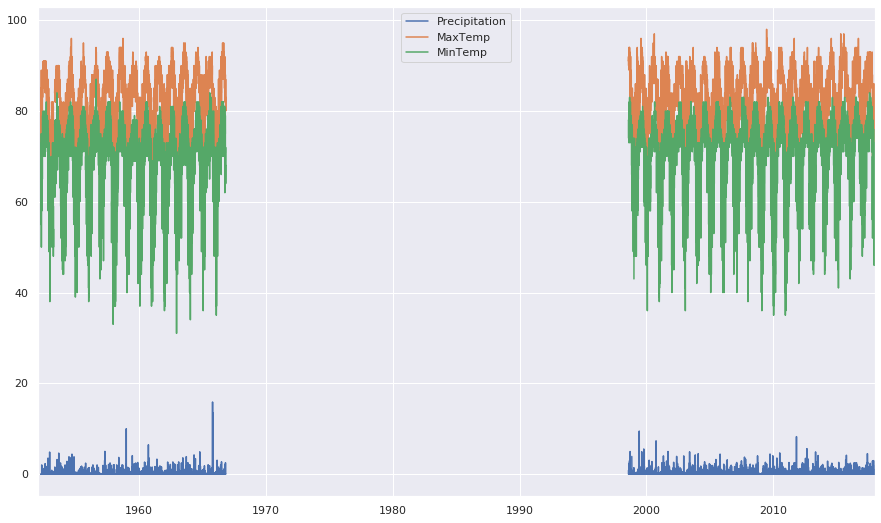

In [25]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
weatherdata.plot(figsize=(15,9))
plt.show()

### We can now clearly see the domain on which we have interpretable data

In [44]:
# now lets keep only relevant columns
weatherdata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 24107 entries, 1952-01-01 to 2017-12-31
Data columns (total 7 columns):
COOPID           24107 non-null category
Year             24107 non-null category
Month            24107 non-null category
Day              24107 non-null category
Precipitation    12212 non-null float64
MaxTemp          12271 non-null float64
MinTemp          12180 non-null float64
dtypes: category(4), float64(3)
memory usage: 852.5 KB


In [45]:
weatheranalytics = weatherdata.copy()
weatheranalytics = weatheranalytics.drop(["COOPID"], axis=1)
weatheranalytics = weatheranalytics.drop(["Year"], axis=1)
weatheranalytics = weatheranalytics.drop(["Month"], axis=1)
weatheranalytics = weatheranalytics.drop(["Day"], axis=1)
weatheranalytics.head()

,Precipitation,MaxTemp,MinTemp
1952-01-01,NaN,NaN,NaN
1952-01-02,NaN,NaN,NaN
1952-01-03,NaN,NaN,NaN
1952-01-04,NaN,NaN,NaN
1952-01-05,NaN,NaN,NaN


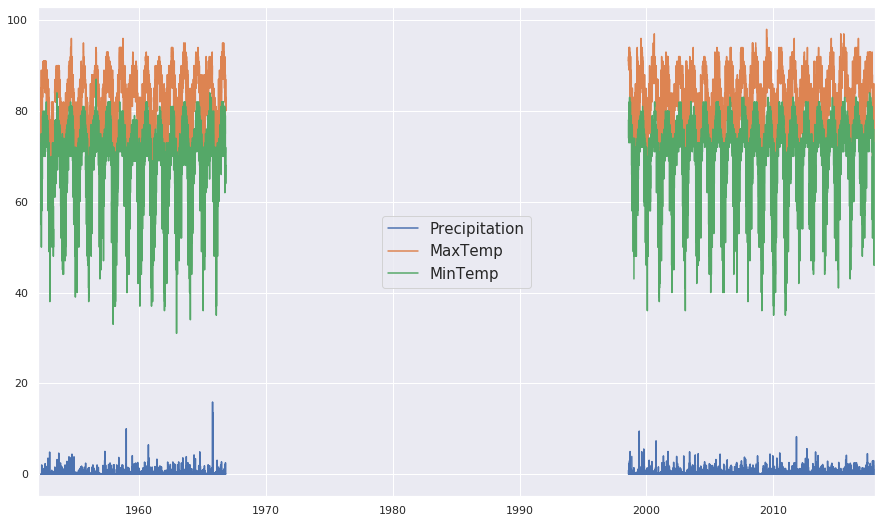

In [49]:
weatheranalytics.plot(figsize=(15,9))
plt.legend(loc='center', fontsize=15)
plt.show()

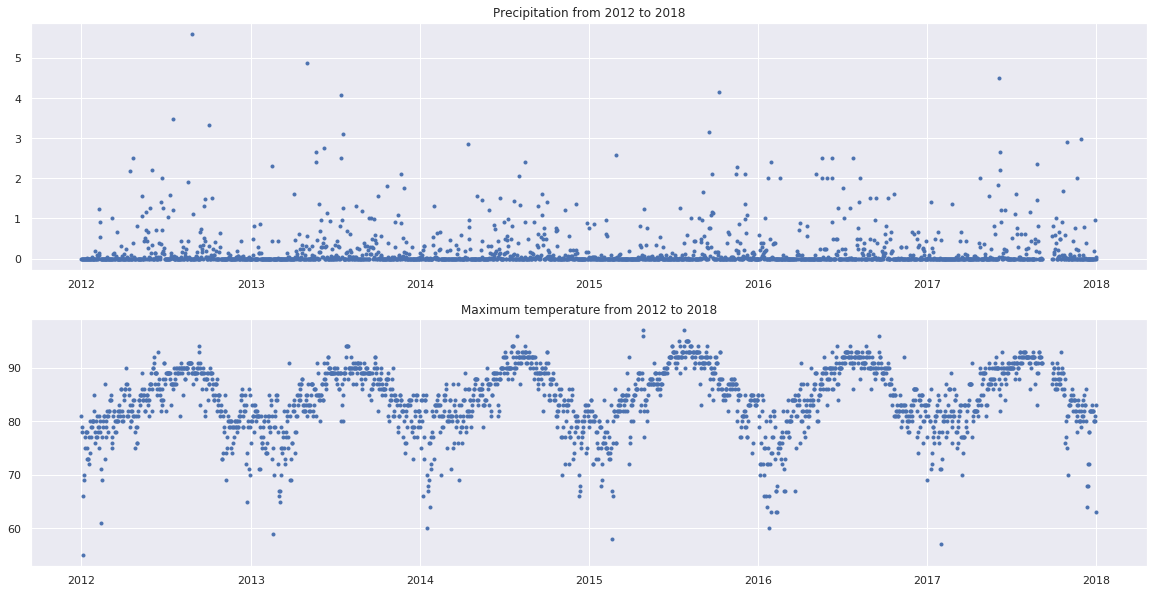

In [126]:
fig, ax = plt.subplots(2,1, figsize=(20,10))
ax[0].plot(weatheranalytics.Precipitation['2012':], marker='.', linestyle='none')
ax[0].title.set_text('Precipitation from 2012 to 2018')
ax[1].plot(weatheranalytics.MaxTemp['2012':], marker='.', linestyle='none')
ax[1].title.set_text('Maximum temperature from 2012 to 2018')
plt.show()

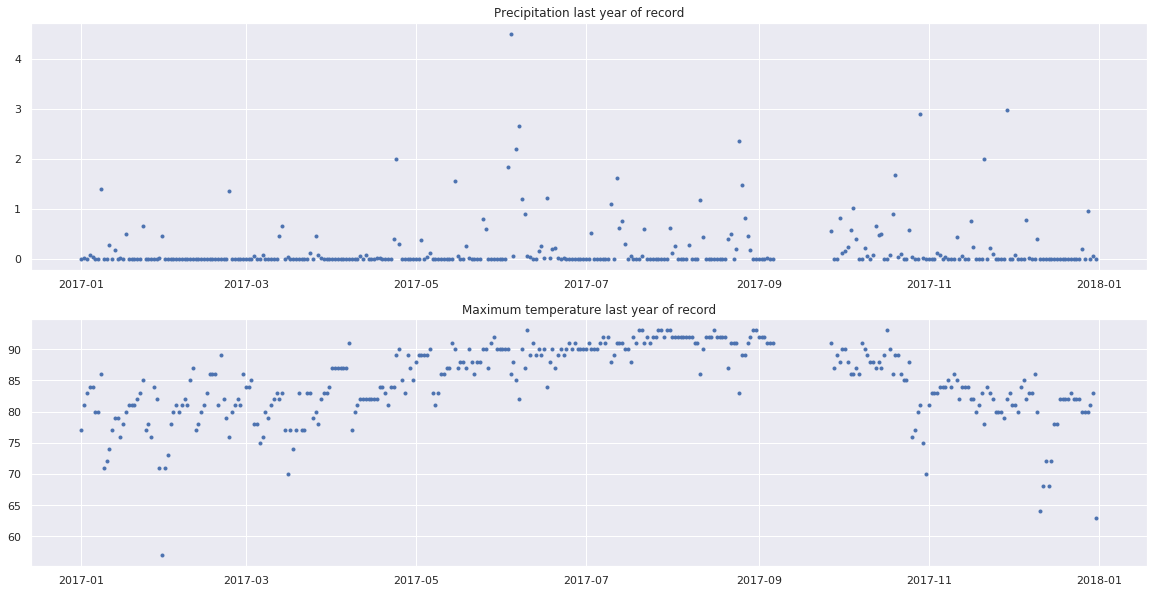

In [179]:
fig, ax = plt.subplots(2,1, figsize=(20,10))
ax[0].plot(weatheranalytics.Precipitation['2017'], marker='.', linestyle='none')
ax[0].title.set_text('Precipitation last year of record')
ax[1].plot(weatheranalytics.MaxTemp['2017'], marker='.', linestyle='none')
ax[1].title.set_text('Maximum temperature last year of record')
plt.show()

In [128]:
# Cutting out the most recent continueously recorded data, that is beginning from 1998-08-01
recentweather = weatheranalytics['1998-08-01':].copy()

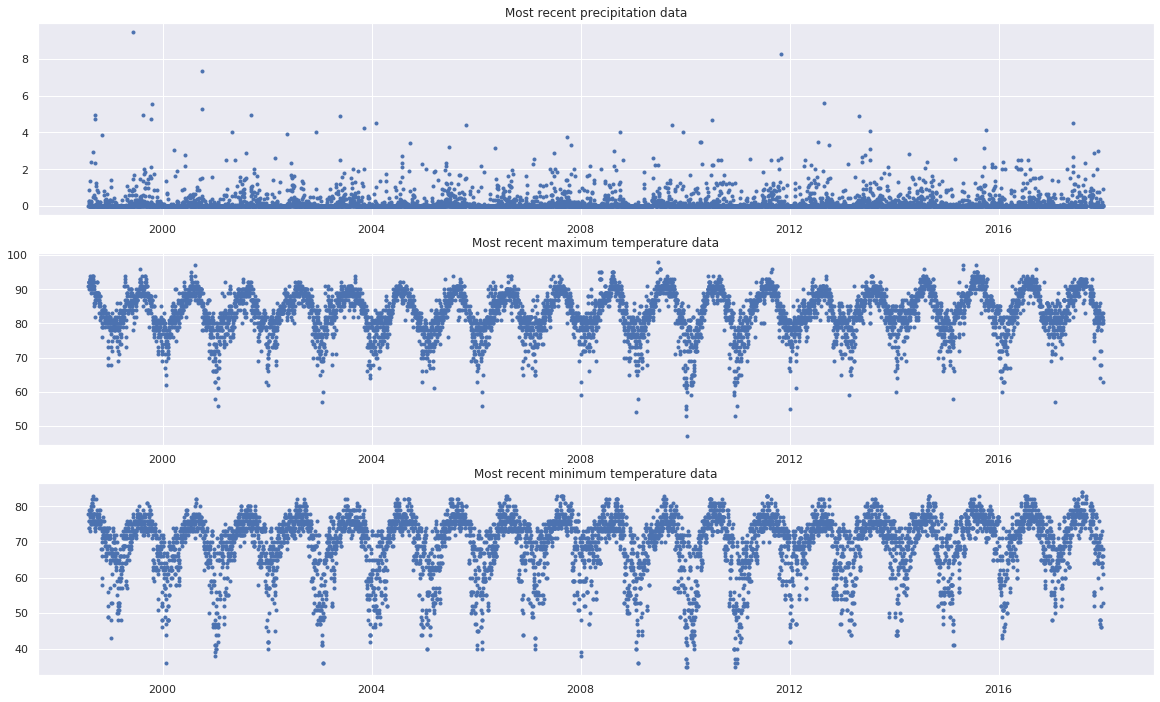

In [136]:
fig, ax = plt.subplots(3,1, figsize=(20,12))
ax[0].plot(recentweather.Precipitation, marker='.', linestyle='none')
ax[0].title.set_text('Most recent precipitation data')
ax[1].plot(recentweather.MaxTemp, marker='.', linestyle='none')
ax[1].title.set_text('Most recent maximum temperature data')
ax[2].plot(recentweather.MinTemp, marker='.', linestyle='none')
ax[2].title.set_text('Most recent minimum temperature data')
plt.show()

In [168]:
# Filling out missing temperature data with closest neighbor observation
# and the precipitation with the typical value 0
recentweather.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7093 entries, 1998-08-01 to 2017-12-31
Data columns (total 3 columns):
Precipitation    6925 non-null float64
MaxTemp          7018 non-null float64
MinTemp          6925 non-null float64
dtypes: float64(3)
memory usage: 221.7 KB


In [174]:
precipi = np.array(recentweather.Precipitation)
maxtemp = np.array(recentweather.MaxTemp)
mintemp = np.array(recentweather.MinTemp)

In [175]:
for i in range(len(recentweather)):
    if np.isnan(precipi[i]):
        precipi[i] = 0.0
    if np.isnan(maxtemp[i]):
        maxtemp[i] = maxtemp[i-1]
    if np.isnan(mintemp[i]):
        mintemp[i] = mintemp[i-1]

In [176]:
recentweather.Precipitation = precipi
recentweather.MaxTemp = maxtemp
recentweather.MinTemp = mintemp
recentweather.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7093 entries, 1998-08-01 to 2017-12-31
Data columns (total 3 columns):
Precipitation    7093 non-null float64
MaxTemp          7093 non-null float64
MinTemp          7093 non-null float64
dtypes: float64(3)
memory usage: 221.7 KB


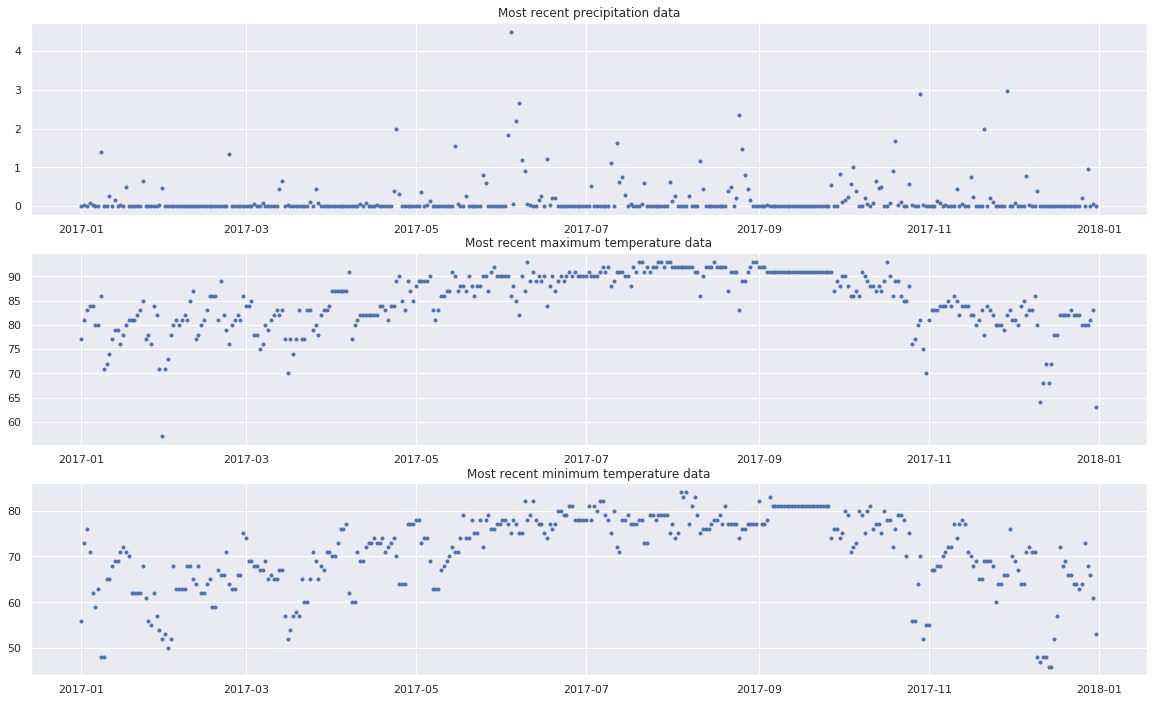

In [178]:
fig, ax = plt.subplots(3,1, figsize=(20,12))
ax[0].plot(recentweather.Precipitation['2017'], marker='.', linestyle='none')
ax[0].title.set_text('Most recent precipitation data')
ax[1].plot(recentweather.MaxTemp['2017'], marker='.', linestyle='none')
ax[1].title.set_text('Most recent maximum temperature data')
ax[2].plot(recentweather.MinTemp['2017'], marker='.', linestyle='none')
ax[2].title.set_text('Most recent minimum temperature data')
plt.show()